In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.linear_model import LinearRegression

# Load the Data

In [2]:
data = pd.read_csv('1.01.+Simple+linear+regression.csv')
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


# Create the Linear Regression

In [3]:
#GPA is y, and SAT is x

In [4]:
x = data['SAT']
y = data['GPA']
#the target is GPA
#the feature is SAT


In [5]:
x.shape
#this is to check the length of the array

(84,)

In [6]:
y.shape

(84,)

In [7]:
#Sklearn needs 3D data so it needs a Matrix
#we need to reshape the SAT scores into a 3D Matrix
x_matrix = np.reshape(x.values,(-1,1))
#we are not changing anything but the dimensionality
x_matrix.shape

(84, 1)

# Regression itself

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(x_matrix,y)

LinearRegression()

# R-Squared

In [10]:
reg.score(x_matrix,y)

0.40600391479679765

# Coefficient and Intercept

In [11]:
m = reg.coef_
c = reg.intercept_

# Making Prediction

In [12]:
#Create a two dimensional DF to test with a category SAT
test = pd.DataFrame(data=[1740,1760,2100], columns=['SAT'])

In [13]:
#Predict the outcome, generates an array
reg.predict(test)

array([3.15593751, 3.18905127, 3.7519852 ])

In [14]:
test['Prediction'] = reg.predict(test)

In [15]:
test

,SAT,Prediction
0,1740,3.155938
1,1760,3.189051
2,2100,3.751985


In [16]:
y1 = 1750
y2 = 1800
y3 = 1850

data2 = m*[y1,y2,y3]+c

#adding a new columns for SAT score predictions
test2 = pd.DataFrame(data=[y1,y2,y3],columns=['New SAT'])
test['Test2 Prediction'] = reg.predict(test2)
test['Test3 Prediction']=data2

In [17]:
test

,SAT,Prediction,Test2 Prediction,Test3 Prediction
0,1740,3.155938,3.172494,3.172494
1,1760,3.189051,3.255279,3.255279
2,2100,3.751985,3.338063,3.338063


Text(0, 0.5, 'GPA')

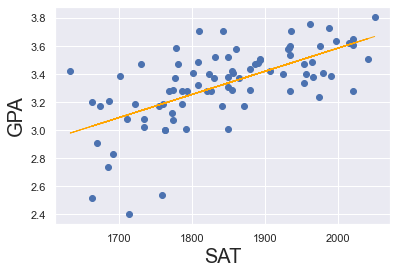

In [18]:
plt.scatter(x,y)
yhat = m*x_matrix+c
plt.plot(x,yhat,lw=1,c='orange',label='regression line')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('GPA',fontsize=20)

### 41% of the data fits the predicted model

# Multiple Linear Regression

## Load Data

In [19]:
data = pd.read_csv('1.02.+Multiple+linear+regression.csv')
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


## Describe the Data

In [20]:
#Here you are figuring out the specifics of the data
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Declare the Variables, x is independent, and y is the dependent variable

In [21]:
x = data[['SAT', 'Rand 1,2,3']]
y  = data['GPA']

## Form the Regressor and begin working with the data

In [22]:
regressor = LinearRegression()

In [23]:
regressor.fit(x,y)

LinearRegression()

In [24]:
c = regressor.intercept_
m = regressor.coef_

In [25]:
#Now you have the basic data for prediction

# R-squred multiple Linear Regression

In [26]:
#pull the R-squred
r2 = regressor.score(x,y)
r2

0.40668119528142843

In [27]:
#adjusted R2 is the better model for multiple regression,but there isnt a ready to use model to use.


### Formula for adjusted R2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [28]:
#start filling out the necessary variables for the equation.
x.shape

(84, 2)

In [29]:
n = x.shape[0]
p = x.shape[1]
n,p

(84, 2)

In [30]:
#now that all the variables are filled out, we can begin solving the equation. 
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

In [31]:
#we can now right a function that helps us solve the expression for the x and y values that we have.

def adjust_r2 (x,y):
    r2 = LinearRegression().fit(x,y).score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
    

In [32]:
adjusted_r2_SATRand = round(adjust_r2(x,y),3)
adjusted_r2_SATRand

0.392

## Feature Selection

In [33]:
# this will help us detected uneeded variables within the sample
# the best way to do this is to pull up the p-values of the individual variables

In [34]:
#import the f-statistic package to do the calculation
from sklearn.feature_selection import f_regression

In [35]:
#this will give you the coeficient and the p-value of the independent variables
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [36]:
# isolate the p-value
p_values = f_regression(x,y)[1]

In [37]:
# create a legible version of the p-value as required
p_values.round(3)
p_values_df = pd.DataFrame(data = p_values.round(3),columns=['p_values'])
p_values_df['Variables'] = ['SAT','Rand 1,2,3']
p_values_df = p_values_df[['Variables','p_values']]

In [38]:
p_values_df

,Variables,p_values
0,SAT,0.000
1,"Rand 1,2,3",0.676


In [39]:
# f-regressions needs to be used with caution as it is too simplistic for more complicated data. 


## Create a summary table

In [40]:
#first create a DataFrame with the variables and you can use x.columns.values to isolate the title of the variables
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [41]:
reg_summary['Coefficient'] = regressor.coef_
reg_summary['p_values'] = p_values.round(3)

In [42]:
reg_summary

,Features,Coefficient,p_values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


## Standardization

In [43]:
#calculating the mean and standard deviation of a dataset
Exchange_Rate = [1.3,1.34,1.25]
Daily_Trading_Vol = [110000,98700,135000]

In [44]:
data2 = pd.DataFrame(data = [1,2,3],columns=['Days'])
data2['Exchange Rate'] = Exchange_Rate
data2['Daily Volume'] = Daily_Trading_Vol
data2.describe()

,Days,Exchange Rate,Daily Volume
count,3.0,3.000000,3.000000
mean,2.0,1.296667,114566.666667
std,1.0,0.045092,18575.880419
min,1.0,1.250000,98700.000000
25%,1.5,1.275000,104350.000000
50%,2.0,1.300000,110000.000000
75%,2.5,1.320000,122500.000000
max,3.0,1.340000,135000.000000


In [46]:
exchange_rate_mean = data2.describe()['Exchange Rate'][1].round(3)
exchange_rate_std = data2.describe()['Exchange Rate'][2].round(3)
exchange_rate_mean,exchange_rate_std

(1.297, 0.045)

## Standardize the formula

$Standardiztion = (x - mean) / std$

In [47]:
x = data2[['Exchange Rate','Daily Volume']]
y = data2['Daily Volume']

In [48]:
def standardize(data):
    standardize = []
    mean = data.describe()[1]
    std = data.describe()[2]
    for i in data:
        standard = (i - mean) / std
        standardize.append(standard.round(2))
    return standardize, mean.round(2), std.round(2)



In [49]:
norm_Exchange = standardize(data2['Exchange Rate'])
norm_Daily = standardize(data2['Daily Volume'])

norm_Exchange,norm_Daily

(([0.07, 0.96, -1.03], 1.3, 0.05), ([-0.25, -0.85, 1.1], 114566.67, 18575.88))

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaler.fit(x)
x_scaled = scaler.transform(x)

In [53]:
x_scaled

array([[ 0.09053575, -0.30108945],
       [ 1.1769647 , -1.046121  ],
       [-1.26750044,  1.34721045]])

## Standardizing SAT/GPA/RAND Data through Feature Scaling

In [59]:
x = data[['SAT','Rand 1,2,3']]
y = data['GPA']
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [60]:
x_scaled.shape

(84, 2)

In [61]:
# now we can calculate the new coefficents for the standardized data, which will give us a better look on the variable

In [71]:
# go ahead and create a linear regression with the scaled data
regressor = LinearRegression()
regressor.fit(x_scaled,y)
# now call the scaled coefficient
regressor.coef_

array([ 0.17181389, -0.00703007])

In [72]:
# and also call the scaled intercept
regressor.intercept_

3.330238095238095

In [82]:
# now we can update our summary even further

reg_summary = pd.DataFrame(['Bias','SAT','Rand 1,2,3'], columns = ['Features'])

In [83]:
# weights is the machine learning version of coefficent
reg_summary['Weights'] = regressor.intercept_, regressor.coef_[0],regressor.coef_[1]

In [85]:
reg_summary
# in the new summary, the closer to 0 the weight is, the smaller the impact and vice versa

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [86]:
# in ML, the intercept is called bias which adjusts the regression with constant. 